## Predict Term Deposit Subscription With Bank Marketing Dataset

#### Name : Panchotiya Bhavin Dhanjibhai
#### Enrollment No. : 23010101634
#### Rollno. : 388

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.shape

(11162, 17)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Data Preprocessing

In [8]:
df.count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
#features with one value

for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [11]:
#categorical features

categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [12]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]

# visualise the numerical variables
df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [13]:
df2=df.copy()

In [14]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [15]:
df2.shape

(11162, 17)

In [16]:
#defaut features does not play imp role
df2.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [17]:
df2.drop(['default'],axis=1, inplace=True)

In [18]:
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [19]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [20]:
df2.groupby('age',sort=True)['age'].count()

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [21]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [22]:
# remove outliers in feature duration...
df2.groupby(['deposit','duration'],sort=True)['duration'].count()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [23]:
# remove outliers in feature campaign...
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [24]:
df3 = df2[df2['campaign'] < 33]

In [25]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [26]:
# remove outliers in feature previous...
df3.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [27]:
df4 = df3[df3['previous'] < 31]

In [28]:
from sklearn.preprocessing import LabelEncoder 
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df4[col] = le.fit_transform(df4[col])
    label_encoders[col] = le  # Store encoder for future reference

C:\Users\OMEN\AppData\Local\Temp\ipykernel_18744\4075698398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = le.fit_transform(df4[col])
C:\Users\OMEN\AppData\Local\Temp\ipykernel_18744\4075698398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = le.fit_transform(df4[col])
C:\Users\OMEN\AppData\Local\Temp\ipykernel_18744\4075698398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [29]:
#cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
#for col in  cat_columns:
 #   df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [30]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_18744\740789341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_18744\740789341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(col, axis=1, inplace=True)
C:\Users\OMEN\AppData\Local\Temp\ipykernel_18744\740789341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [31]:
df4.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new,deposit_new
0,59,0,1,1,2343,2,5,8,1042,1,0,3,1,0,1
1,56,0,1,1,45,2,5,8,1467,1,0,3,0,0,1
2,41,9,1,1,1270,2,5,8,1389,1,0,3,1,0,1
3,55,7,1,1,2476,2,5,8,579,1,0,3,1,0,1
4,54,0,1,2,184,2,5,8,673,2,0,3,0,0,1


### Data Visualization

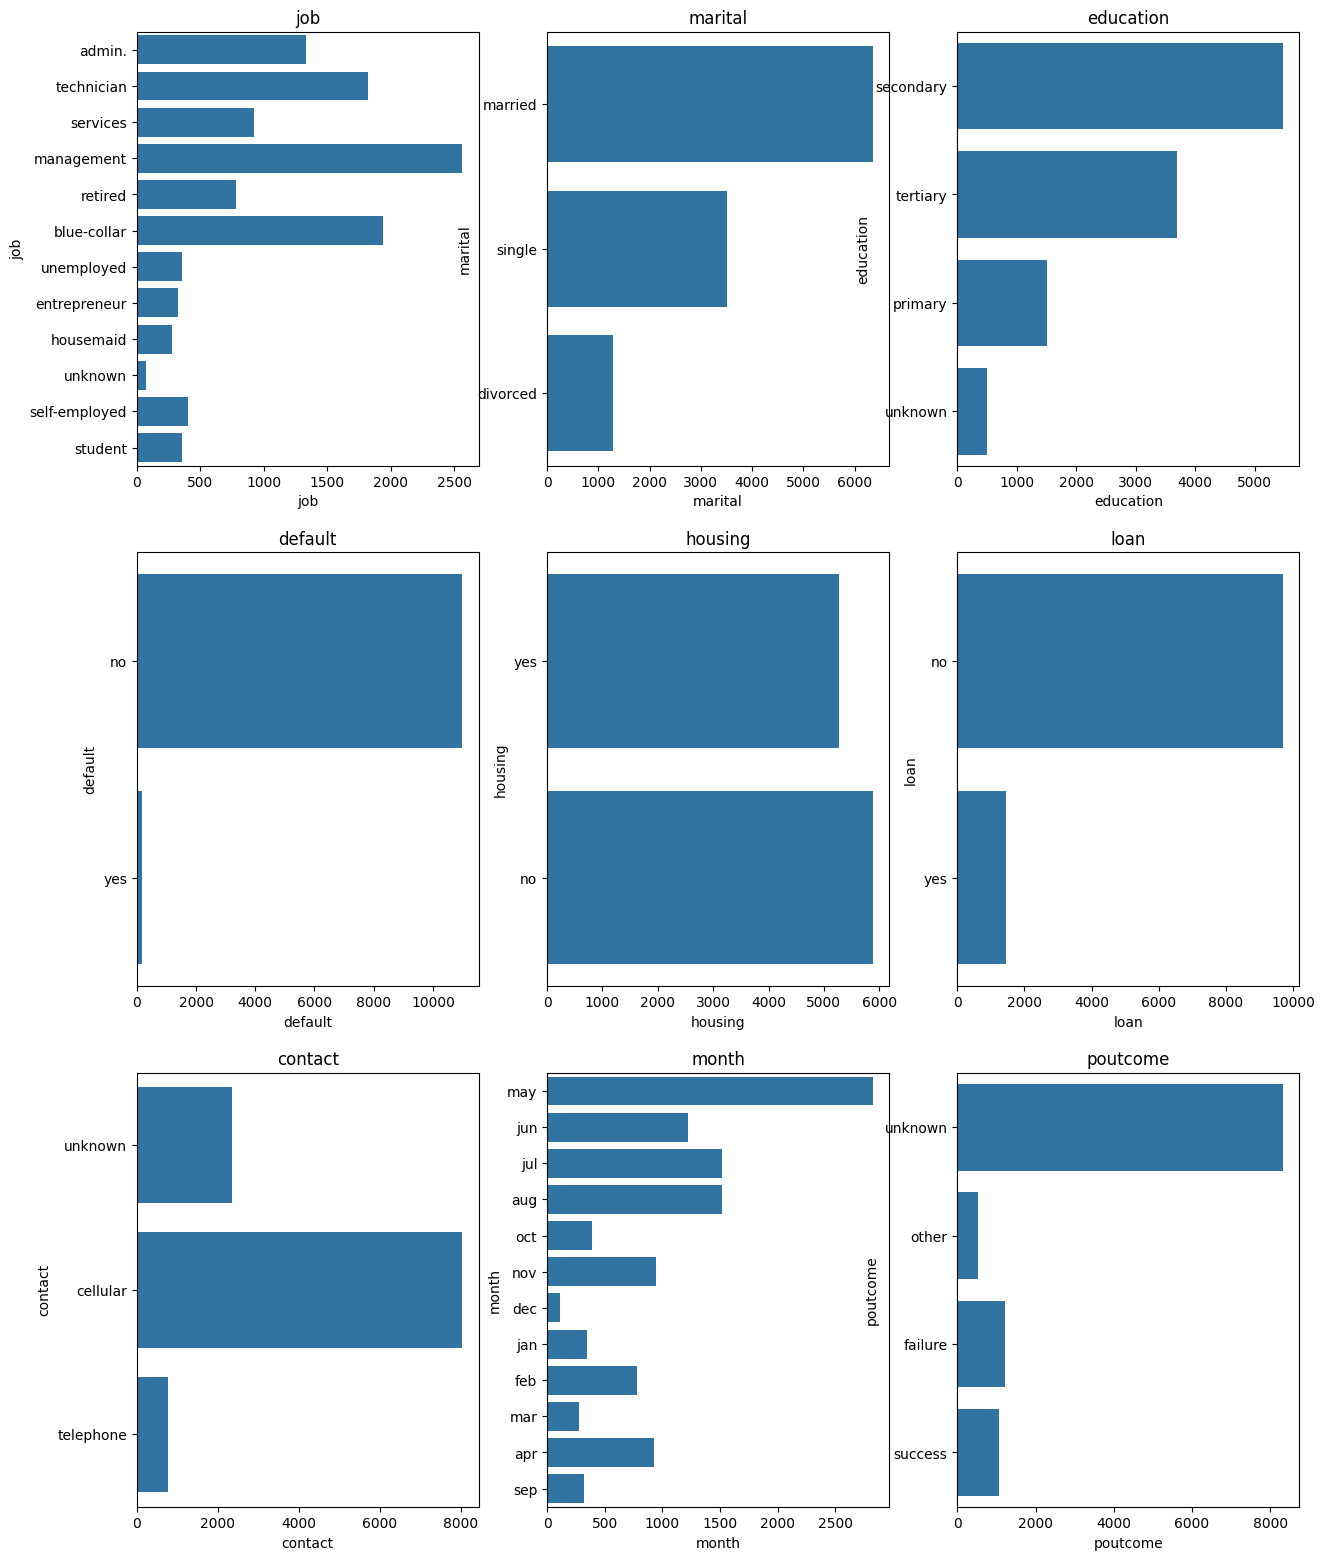

In [32]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

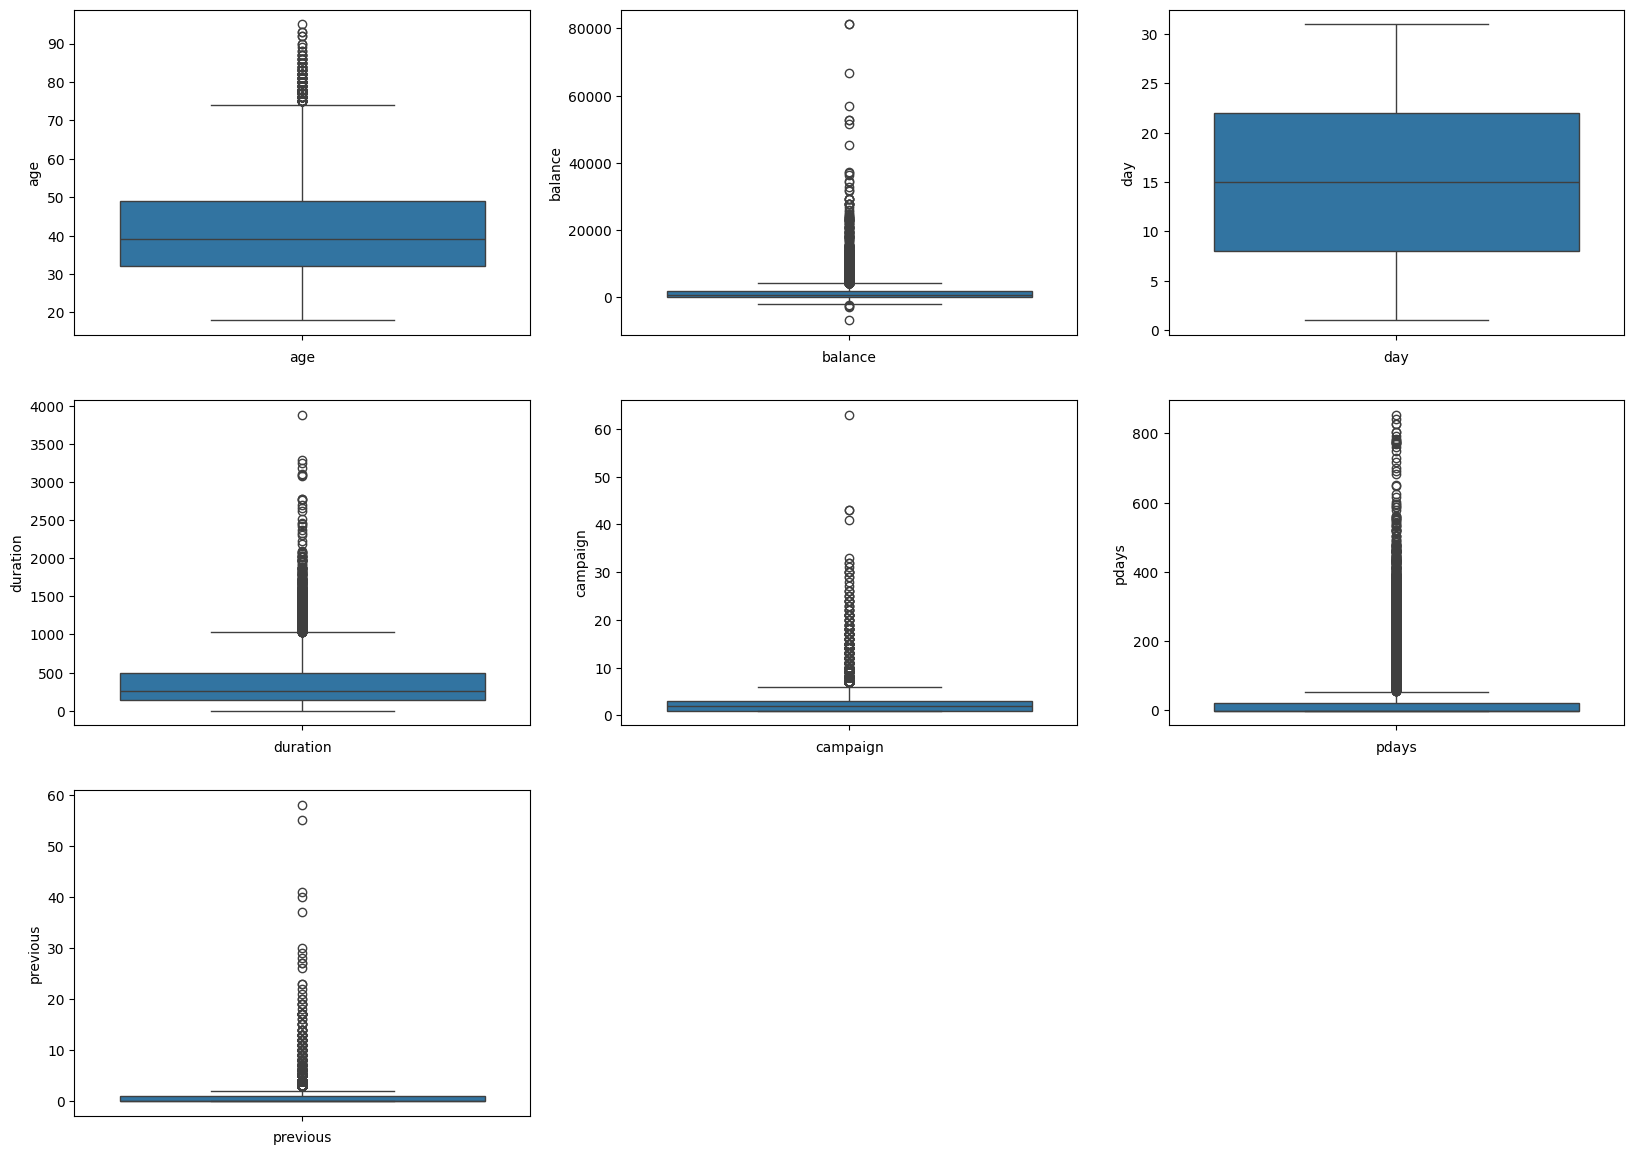

In [33]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<Axes: >

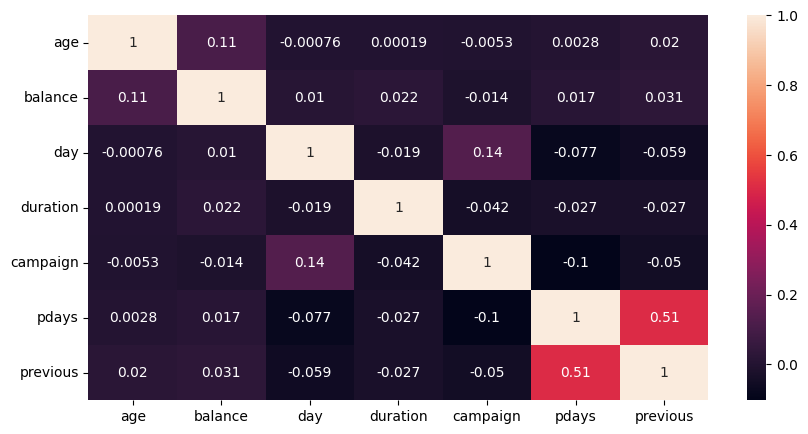

In [34]:
## Checking for correlation
cor_mat=df.corr(numeric_only=True)
fig = plt.figure(figsize=(10,5))
sns.heatmap(cor_mat,annot=True)

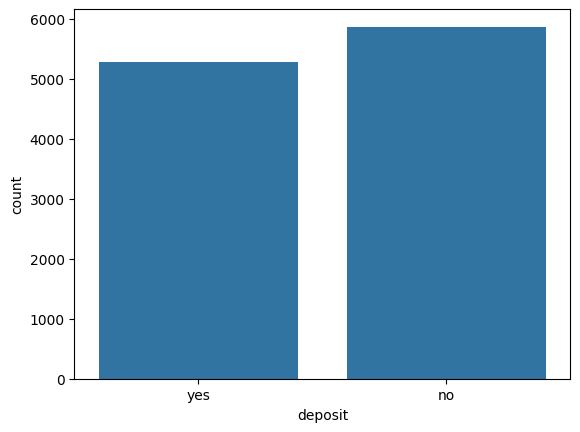

In [35]:
#total patient count based on cardio_results
sns.countplot(x='deposit',data=df)
plt.show()

In [36]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [37]:
X = df4.drop(['deposit_new'],axis=1)
y = df4['deposit_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [38]:
X_train

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new
8720,46,1,1,1,624,0,16,0,201,1,0,3,1,0
3812,43,1,1,0,2952,0,3,1,417,2,1,1,0,0
3525,34,0,1,1,920,0,14,8,526,3,3,2,0,0
5379,38,1,1,0,178,2,20,8,245,1,0,3,1,0
6574,27,4,2,1,35,0,4,5,255,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,19,8,2,3,779,0,1,0,184,4,0,3,0,0
3265,60,0,1,1,106,0,24,3,137,1,4,2,0,0
9854,47,4,0,2,107,2,15,8,246,1,0,3,0,0
10809,53,9,2,1,-165,0,9,5,89,1,0,3,1,0


In [39]:
len(X_test)

2231

### Model Selection

In [40]:
#Random Forest or Xgboost

In [41]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.84705882 0.83408072 0.83576233 0.83744395 0.85538117]
0.8419453969928778


In [43]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.85154062 0.84529148 0.85313901 0.85089686 0.85257848]
0.8506892891685822


In [44]:
#hyperparameter tuning

model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
#             'max_features': ['auto', 'log2']
#             'max_features': []
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [45]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False, error_score='raise')
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [46]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': np.float64(0.7863138048654005),
  'best_params': {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': np.float64(0.8169903500009046),
  'best_params': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}}]

In [58]:
X_train

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,housing_new,loan_new
8720,46,1,1,1,624,0,16,0,201,1,0,3,1,0
3812,43,1,1,0,2952,0,3,1,417,2,1,1,0,0
3525,34,0,1,1,920,0,14,8,526,3,3,2,0,0
5379,38,1,1,0,178,2,20,8,245,1,0,3,1,0
6574,27,4,2,1,35,0,4,5,255,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,19,8,2,3,779,0,1,0,184,4,0,3,0,0
3265,60,0,1,1,106,0,24,3,137,1,4,2,0,0
9854,47,4,0,2,107,2,15,8,246,1,0,3,0,0
10809,53,9,2,1,-165,0,9,5,89,1,0,3,1,0


In [59]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=5,n_estimators=300)

In [60]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
import pickle 
filename = 'model.pkl'
# Save the trained model as a pickle string. 
saved_model = pickle.dump(model_xgb, open(filename, 'wb')) 

In [50]:
model_xgb.score(X_test,y_test)

c:\Users\OMEN\Desktop\Term-Deposit-Prediction\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


0.8489466606902735

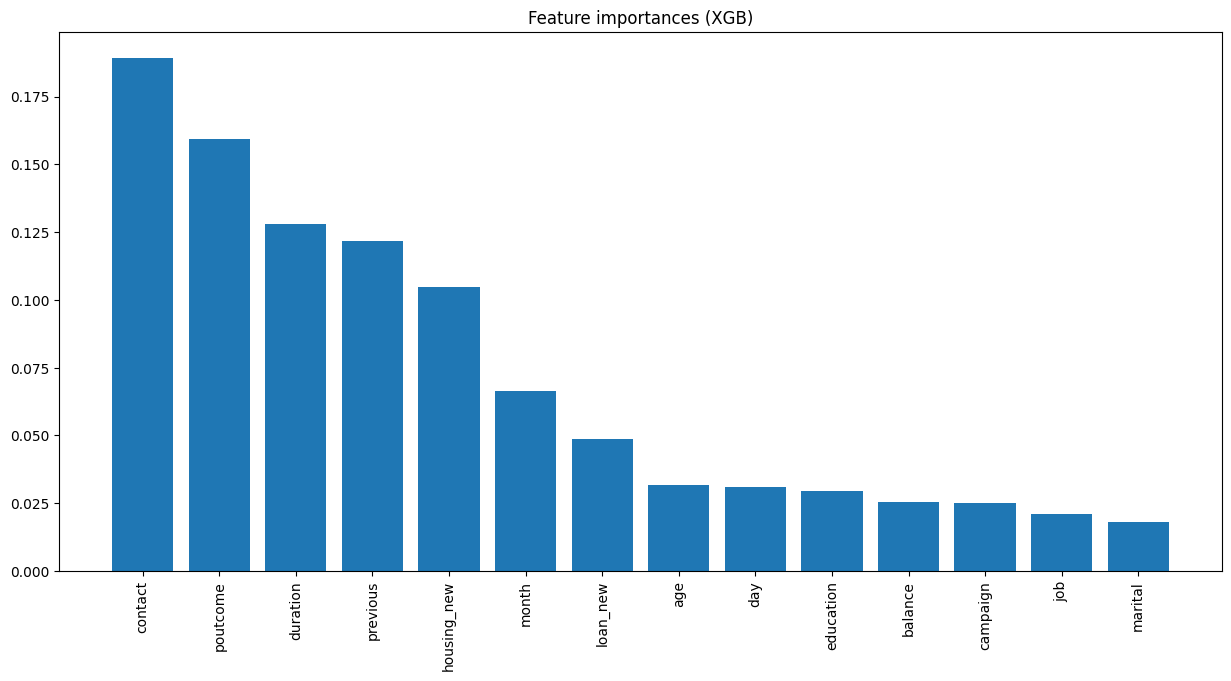

In [51]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[981, 198],
       [139, 913]])

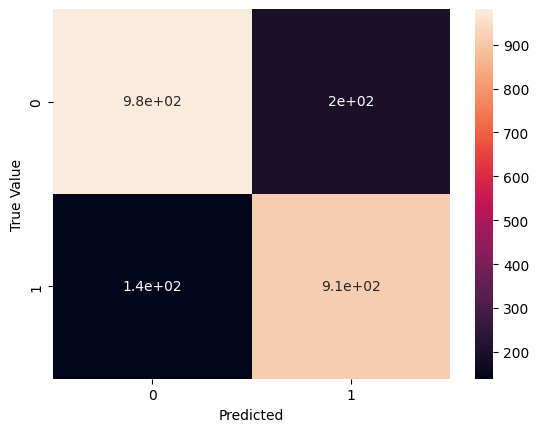

In [53]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model_xgb.predict(X_test)))

0.8489466606902735


In [55]:
#overfitt or underfit

print(accuracy_score(y_test,model_xgb.predict(X_test)))

0.8489466606902735


In [56]:
#without library for XGBOOST

In [57]:
import numpy as np

class OptimizedSimpleXGBoost:
    def __init__(self, n_estimators=50, learning_rate=0.1, gamma=0.1, min_samples_split=2):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.min_samples_split = min_samples_split
        self.trees = []
    
    def mean_squared_error_gradient(self, y_true, y_pred):
        return y_true - y_pred

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.y_pred = np.zeros(n_samples)
        
        for _ in range(self.n_estimators):
            gradients = self.mean_squared_error_gradient(y, self.y_pred)
            tree = self.build_tree(X, gradients)
            self.trees.append(tree)
            update = self.learning_rate * tree.predict(X)
            self.y_pred += update

    def build_tree(self, X, gradients):
        best_split = self.find_best_split(X, gradients)
        return best_split
    
    def find_best_split(self, X, gradients):
        best_feature, best_threshold, best_value = None, None, None
        best_loss = float('inf')
        
        for feature in range(X.shape[1]):
            thresholds = np.percentile(X[:, feature], [25, 50, 75])
            for threshold in thresholds:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask
                if np.sum(left_mask) < self.min_samples_split or np.sum(right_mask) < self.min_samples_split:
                    continue
                left_grad = np.sum(gradients[left_mask])
                right_grad = np.sum(gradients[right_mask])
                loss = - (left_grad ** 2 + right_grad ** 2)
                
                if loss < best_loss:
                    best_loss = loss
                    best_feature = feature
                    best_threshold = threshold
                    best_value = (left_grad + right_grad) / 2
        
        return SimpleTree(best_feature, best_threshold, best_value)
    
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return np.where(y_pred >= 0.5, 1, 0)

class SimpleTree:
    def __init__(self, feature, threshold, value):
        self.feature = feature
        self.threshold = threshold
        self.value = value

    def predict(self, X):
        return np.where(X[:, self.feature] < self.threshold, self.value, -self.value)